In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from csc.workbench import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


In [2]:
batchSize = 200
input_signals_db = f'/home/gomes/synthetic-data/csc-signals-{batchSize}.json'
input_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'

In [3]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'
path_to_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mp-{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [4]:
with open(path_to_signals_db, 'r') as f:
            output_data = json.load(f)
            signals_results = output_data['signals']

id0 = next(x['id'] for x in signals_results if x['sparsity'] == 6 and x['snr'] == 0)


In [5]:
signal_id = id0+5
signal_dict = workbench.signalDictFromId(signal_id)
csc_results = dictionary.alphaCSCResult(signal_dict, nb_activations=1, verbose=True)

Iteration 0: lambda = 5.00e-05, Number of Activations = 26137
Iteration 1: lambda = 1.05e-01, Number of Activations = 13993
Iteration 2: lambda = 1.17e+02, Number of Activations = 0
Iteration 3: lambda = 5.96e+00, Number of Activations = 0
Iteration 4: lambda = 3.97e-01, Number of Activations = 7475
Iteration 5: lambda = 2.38e+02, Number of Activations = 0
Iteration 6: lambda = 1.23e+01, Number of Activations = 0
Iteration 7: lambda = 9.91e-01, Number of Activations = 730
Iteration 8: lambda = 5.88e+01, Number of Activations = 0
Iteration 9: lambda = 3.88e+00, Number of Activations = 0
Iteration 10: lambda = 1.14e+00, Number of Activations = 399
Iteration 11: lambda = 3.73e+01, Number of Activations = 0
Iteration 12: lambda = 2.94e+00, Number of Activations = 0
Iteration 13: lambda = 1.23e+00, Number of Activations = 197
Iteration 14: lambda = 2.05e+01, Number of Activations = 0
Iteration 15: lambda = 2.19e+00, Number of Activations = 0
Iteration 16: lambda = 1.27e+00, Number of Activa

In [6]:
print('Number of atoms: {}'.format(len(csc_results)))
for atom in csc_results :
    print(atom)


Number of atoms: 1
{'x': 140, 'b': 0.055, 'y': 0.012, 's': 1.653959710339202e-05}


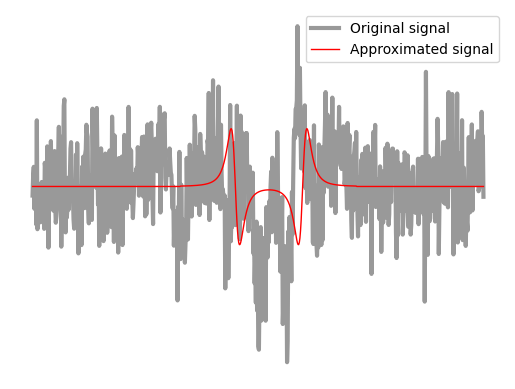

In [7]:
approx = np.zeros_like(signal_dict['signal'])
for atom in csc_results :
    zs_atom = ZSAtom.from_dict(atom)
    zs_atom.padBothSides(dictionary.getAtomsLength())
    approx += zs_atom.getAtomInSignal(signal_length=len(signal_dict['signal']), offset=atom['x'])
plt.plot(signal_dict['signal'], color='k', lw=3, alpha=0.4, label='Original signal')
plt.plot(approx, color='r', lw=1, label='Approximated signal')
plt.legend()
plt.axis('off')
plt.show()
